In [10]:
##DecisionTreeClassifier
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [2]:
#load data
data_train=pd.read_csv('data_train.csv' )

In [3]:
#train and test split
X_train, X_val, y_train, y_val = train_test_split(data_train.drop('reordered', axis=1), data_train.reordered, test_size = 0.8, random_state = 50) 

In [4]:
#perform train dataframe with DecisionTreeClassifier entropy. 
clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 50, max_depth = 3, min_samples_leaf = 5) 
model = clf_entropy.fit(X_train, y_train)

# Predict on validation set with fixed threshold
y_val_pred = (model.predict_proba(X_val)[:,1] >= 0.30).astype(int)

print("F1 Score: ",f1_score(y_val, y_val_pred, average='binary'))
print("Classification Report\n ", classification_report(y_val, y_val_pred))
print("Confusion Matrix\n ", confusion_matrix(y_val, y_val_pred))

F1 Score:  0.36635005253927283
Classification Report
                precision    recall  f1-score   support

         0.0       0.93      0.97      0.95   6117042
         1.0       0.49      0.29      0.37    662687

    accuracy                           0.90   6779729
   macro avg       0.71      0.63      0.66   6779729
weighted avg       0.88      0.90      0.89   6779729

Confusion Matrix
  [[5910655  206387]
 [ 467795  194892]]


In [5]:
#Feature importance
feature_importances_df = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances_df)

                   importance
times_last5          0.789917
uxp_reorder_ratio    0.174556
p_reorder_ratio      0.035527
uxp_total_bought     0.000000
u_total_orders       0.000000
u_reordered_ratio    0.000000
p_total_purchases    0.000000


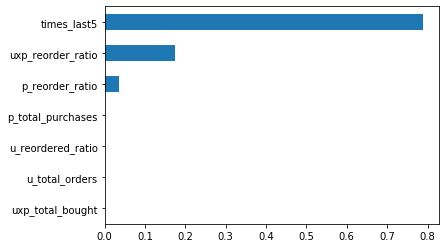

In [8]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
feat_importances.plot(kind='barh')

In [11]:
##modeling with different set of features
#Feature Selection
model2 = SelectFromModel(clf_entropy, prefit=True, max_features=4)
feature_idx = model2.get_support()
feature_names = data_train.drop('reordered', axis=1).columns[feature_idx]
X_NEW = model2.transform(data_train.drop('reordered', axis=1))
pd.DataFrame(X_NEW, columns= feature_names)

In [15]:
#modeling with new features
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_NEW, data_train.reordered, test_size=0.8, random_state=50)
clf_entropy2 = DecisionTreeClassifier( criterion = "entropy", random_state = 50, max_depth = 3, min_samples_leaf = 5) 
model3 = clf_entropy2.fit(X_train2, y_train2) 

y_val_pred2 = (model3.predict_proba(X_val2)[:,1] >= 0.30).astype(int)

print("F1 Score: ",f1_score(y_val2, y_val_pred2, average='binary'))
print("Classification Report\n ", classification_report(y_val2, y_val_pred2))
print("Confusion Matrix\n ", confusion_matrix(y_val2, y_val_pred2))

F1 Score:  0.40366216042918746
Classification Report
                precision    recall  f1-score   support

         0.0       0.93      0.94      0.94   6117042
         1.0       0.42      0.39      0.40    662687

    accuracy                           0.89   6779729
   macro avg       0.68      0.66      0.67   6779729
weighted avg       0.88      0.89      0.89   6779729

Confusion Matrix
  [[5765214  351828]
 [ 406149  256538]]


In [16]:
#New Feature importance
X_NEW = pd.DataFrame(X_NEW, columns= feature_names)
feature_importances_df2 = pd.DataFrame(model3.feature_importances_, index = X_NEW.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances_df2)

                   importance
times_last5          0.798359
uxp_reorder_ratio    0.201641


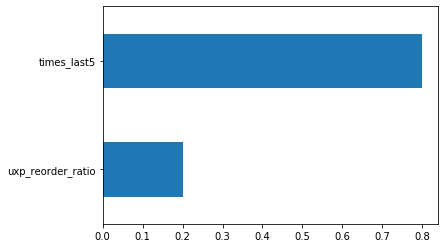

In [17]:
#Feature Importance Plot
feat_importances2 = pd.Series(model3.feature_importances_, index = X_NEW.columns).sort_values()
feat_importances2.plot(kind='barh')